In [1]:
pip install fbprophet

### For real time data

In [2]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('/content/drive/My Drive/DS_Project7/covid19_confirmed_global_prophet.csv')
df.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [3]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
182,2020-07-22
183,2020-07-23
184,2020-07-24
185,2020-07-25
186,2020-07-26


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
182,2020-07-22,382233.776567,246497.936847,531949.884361
183,2020-07-23,385052.052567,247860.179321,536974.698385
184,2020-07-24,387993.785410,249058.700901,543209.779306
185,2020-07-25,390379.428165,249125.918862,549962.940102
186,2020-07-26,392568.533566,248955.887944,556323.416124


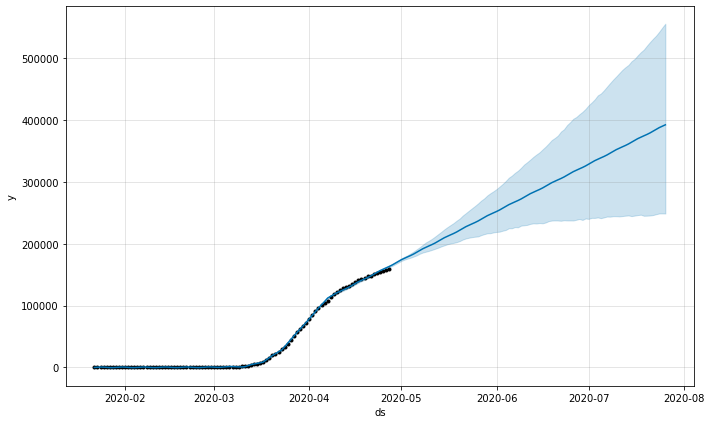

In [6]:
fig1 = m.plot(forecast)

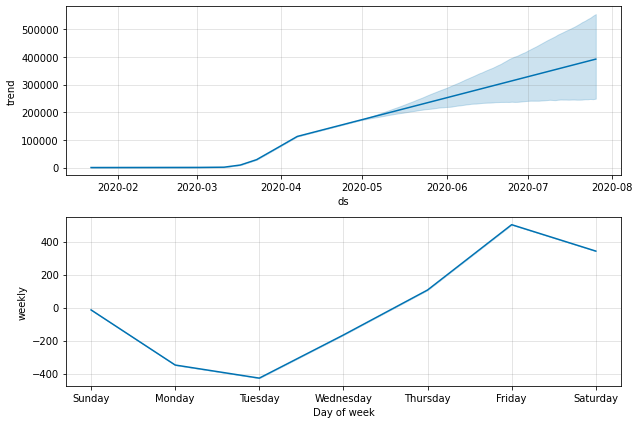

In [7]:
fig2 = m.plot_components(forecast)

In [8]:
#Configuring plotly
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML("""
    <script src="/static/components/requirejs/require.js"></script>
    <script> 
      requirejs.config({
          paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
          },
      });
      </script>
      """))
  
from fbprophet.plot import plot_plotly
import plotly.offline as py

configure_plotly_browser_state()

In [9]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [10]:
#Setting a cap totalling to germany's population
df['cap'] = 83000000

#Logistic fitting
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


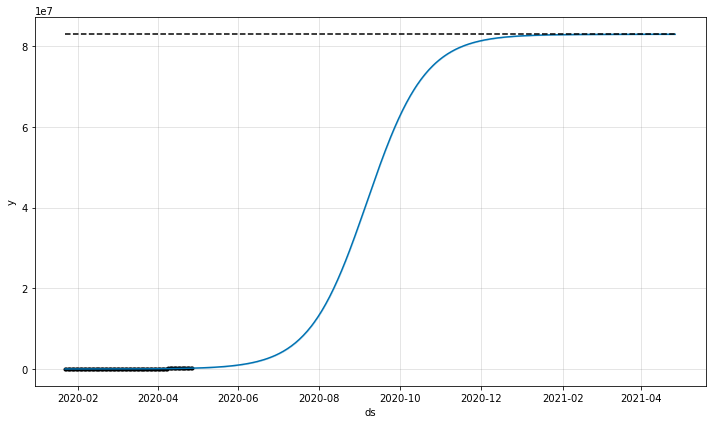

In [11]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 83000000
fcst = m.predict(future)
fig = m.plot(fcst)

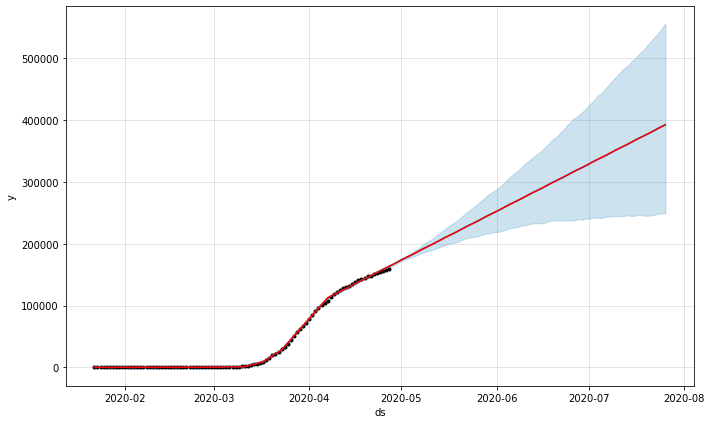

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

##Seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


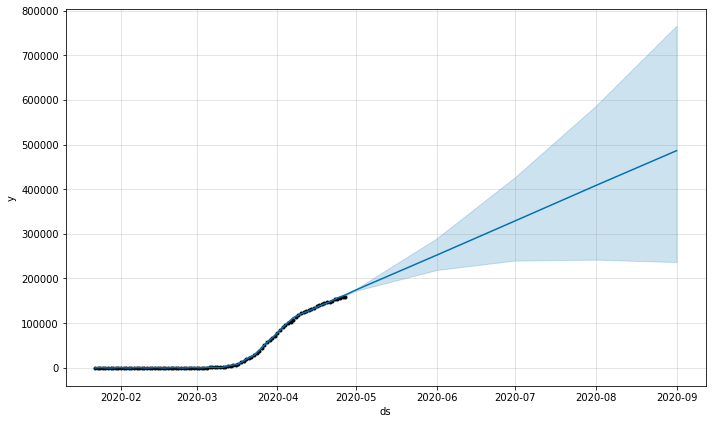

In [13]:
df1 = pd.read_csv('/content/drive/My Drive/DS_Project7/covid19_confirmed_global_prophet.csv')
m1 = Prophet()
m1.fit(df1)
future1 = m1.make_future_dataframe(5, freq='MS')
forecast1 = m1.predict(future1)
fig1 = m1.plot(forecast1)

###Uncertainity in seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


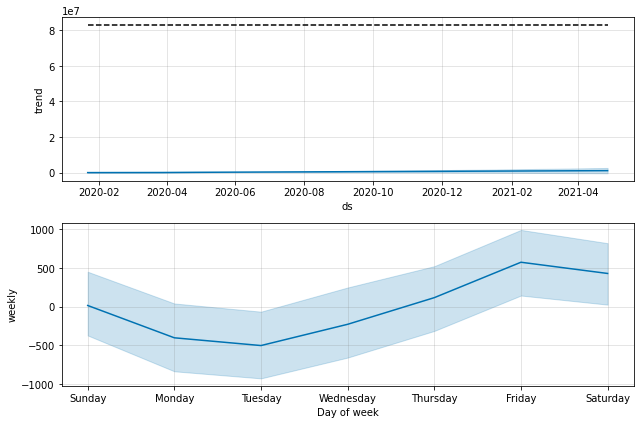

In [14]:
m2 = Prophet(mcmc_samples=300)
forecast2 = m2.fit(df).predict(future)
fig = m2.plot_components(forecast2)

In [15]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '72 days', period='180 days', horizon = '24 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-03 00:00:00 and 2020-04-03 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-04,113333.184017,109296.913314,117019.452150,96092,2020-04-03
1,2020-04-05,127174.708773,123372.120058,130613.678712,100123,2020-04-03
2,2020-04-06,142840.451832,139288.130619,146637.281671,103374,2020-04-03
3,2020-04-07,160380.569469,156881.606826,164047.493520,107663,2020-04-03
4,2020-04-08,180274.443876,176515.123230,183936.088666,113296,2020-04-03


In [16]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,5.145267e+08,22683.180706,22146.446395,0.224804,0.224804,0.0
1,3 days,1.144698e+09,33833.384162,33259.080302,0.325984,0.325984,0.0
2,4 days,2.168371e+09,46565.775796,46092.010651,0.435718,0.435718,0.0
3,5 days,3.632627e+09,60271.278711,59848.006673,0.540417,0.540417,0.0
4,6 days,5.818455e+09,76278.799530,75770.419211,0.653357,0.653357,0.0


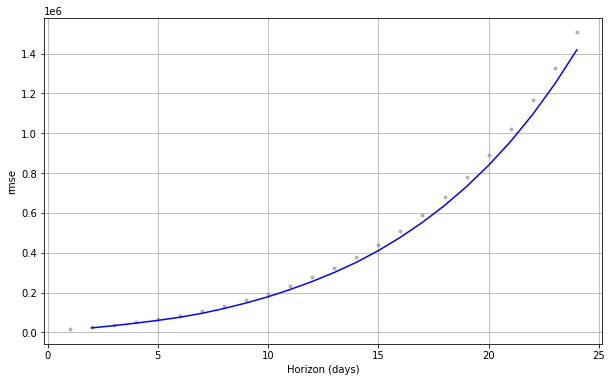

In [17]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')